<a href="https://colab.research.google.com/github/madhabkafle/Hate_Speech_detector/blob/hello-world/ML_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
# import warnings 
# warnings.filterwarnings('ignore')
path="/content/drive/MyDrive/Master File MERGEDFILE.CSV"
df = pd.read_csv(path, encoding= 'unicode_escape')
print(df.head)

#df['label'] = df['label'].astype(int)

<bound method NDFrame.head of        index                                               text label  \
0          1  RT @warreports: 8 Pakistanis of #IRGC 's Zeyna...     1   
1          2                gronk tide pod commercial retarded      1   
2          3  @sfrantzman @pmakela1 what they found in Syria...     0   
3          4  After Pakistani Taliban announcement of their ...     0   
4          5  Good luck getting our attention this week ISIS...     0   
...      ...                                                ...   ...   
10127  10128              mamona eso ya es mu antiguo... ??????     0   
10128  10129  Joder, as? que para Antena3, Constituci?n = Fr...     0   
10129  10130  La fiscal?a va a estar muy ocupada investigand...     0   
10130  10131  Odiame pero al mirarte a un espejo recuerda: y...     1   
10131  10132      alex ya sabemos que eres gay no disimules m?s     0   

      Unnamed: 3 Unnamed: 4 Unnamed: 5 Unnamed: 6 Unnamed: 7 Unnamed: 8  \
0            NaN  

Clean : DELETE THE SPECIAL CHARACTERS 

In [ ]:
df.drop(['Unnamed: 3','Unnamed: 4','Unnamed: 5','Unnamed: 6','Unnamed: 7','Unnamed: 8','Unnamed: 9'], axis=1, inplace=True)

df['text'] = df['text'].str.replace(r'\W'," ",regex=True)
print(df.head)


<bound method NDFrame.head of        index                                               text label
0          1  RT  warreports  8 Pakistanis of  IRGC  s Zeyna...     1
1          2                gronk tide pod commercial retarded      1
2          3   sfrantzman  pmakela1 what they found in Syria...     0
3          4  After Pakistani Taliban announcement of their ...     0
4          5  Good luck getting our attention this week ISIS...     0
...      ...                                                ...   ...
10127  10128              mamona eso ya es mu antiguo               0
10128  10129  Joder  as  que para Antena3  Constituci n   Fr...     0
10129  10130  La fiscal a va a estar muy ocupada investigand...     0
10130  10131  Odiame pero al mirarte a un espejo recuerda  y...     1
10131  10132      alex ya sabemos que eres gay no disimules m s     0

[10132 rows x 3 columns]>


Clean : DELETE THE  NULL VALUE

In [ ]:
df.isnull().sum()
df.dropna()

,index,text,label
0,1,RT warreports 8 Pakistanis of IRGC s Zeyna...,1
1,2,gronk tide pod commercial retarded,1
2,3,sfrantzman pmakela1 what they found in Syria...,0
3,4,After Pakistani Taliban announcement of their ...,0
4,5,Good luck getting our attention this week ISIS...,0
...,...,...,...
10127,10128,mamona eso ya es mu antiguo,0
10128,10129,Joder as que para Antena3 Constituci n Fr...,0
10129,10130,La fiscal a va a estar muy ocupada investigand...,0
10130,10131,Odiame pero al mirarte a un espejo recuerda y...,1


In [ ]:
df['label'] = pd.to_numeric(df['label'], errors='coerce')

# Drop the rows containing NaN in the 'label' column
df = df.dropna(subset=['label'])

# Convert the 'label' column to integer type
df['label'] = df['label'].astype(int)

# Now you can use the converted 'label' column for your classification task
print(df['label'])

0        1
1        1
2        0
3        0
4        0
        ..
10127    0
10128    0
10129    0
10130    1
10131    0
Name: label, Length: 10083, dtype: int64


MAKE 3 DIFFERENT LANGUAGES .CSV FILE

In [ ]:
!pip install langdetect

from langdetect import detect, LangDetectException



# Create empty dataframes for each language
english_df = pd.DataFrame(columns=['index', 'text', 'label'])
german_df = pd.DataFrame(columns=['index', 'text', 'label'])
spanish_df = pd.DataFrame(columns=['index', 'text', 'label'])

# Loop through each row of the original CSV file
for index, row in df.iterrows():
    text = row['text']
    if text and len(text) > 0:  # Check that text is not empty or too short
        try:
            lang = detect(text)
        except LangDetectException:
            continue
        if lang == 'en':
            # Add the row to the English dataframe
            english_df = english_df.append(row)
        elif lang == 'de':
            # Add the row to the German dataframe
            german_df = german_df.append(row)
        elif lang == 'es':
            # Add the row to the Spanish dataframe
            spanish_df = spanish_df.append(row)

# Write the new dataframes to separate CSV files
english_df.to_csv('english.csv', index=False)
german_df.to_csv('german.csv', index=False)
spanish_df.to_csv('spanish.csv', index=False)

#Print the contents of the new CSV files
# print('Contents of english.csv:')
# with open('english.csv', 'r') as f:
#     print(f.read())
# print('Contents of german.csv:')
# with open('german.csv', 'r') as f:
#     print(f.read())
# print('Contents of spanish.csv:')
# with open('spanish.csv', 'r') as f:
#     print(f.read())


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Streaming output truncated to the last 5000 lines.
<ipython-input-40-4e90cad4dfca>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  german_df = german_df.append(row)
<ipython-input-40-4e90cad4dfca>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  german_df = german_df.append(row)
<ipython-input-40-4e90cad4dfca>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  german_df = german_df.append(row)
<ipython-input-40-4e90cad4dfca>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  german_df = german_df.append(row)
<ipython-input-40-4e90cad4dfca>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a fut

PRINT 3 LANGUAGES .CSV FILE

In [ ]:
df_E = pd.read_csv('english.csv')
df_G = pd.read_csv('german.csv')
df_S = pd.read_csv('spanish.csv')


In [ ]:
from prettytable import PrettyTable

count_E0 = (df_E['label'] == 0).sum()
count_E1 = (df_E['label'] == 1).sum()

count_G0 = (df_G['label'] == 0).sum()
count_G1 = (df_G['label'] == 1).sum()


count_S0 = (df_S['label'] == 0).sum()
count_S1 = (df_S['label'] == 1).sum()


table = PrettyTable()
table.field_names = ["Language", "Hate", "Non Hate"]
table.add_row(["English",count_E1,count_E0])
table.add_row(["German",count_G1,count_G0])
table.add_row(["Spanish",count_S1,count_S0])

print(table)


+----------+------+----------+
| Language | Hate | Non Hate |
+----------+------+----------+
| English  | 2426 |   2574   |
|  German  | 1522 |   1510   |
| Spanish  | 324  |   830    |
+----------+------+----------+


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud
text1 = " ".join(title for title in df.text)
# Creating word_cloud with text as argument in .generate() method

word_cloud1 = WordCloud(collocations = False, background_color = 'white',
                        width = 2048, height = 1080).generate(text1)
# saving the image
word_cloud1.to_file('got.png')


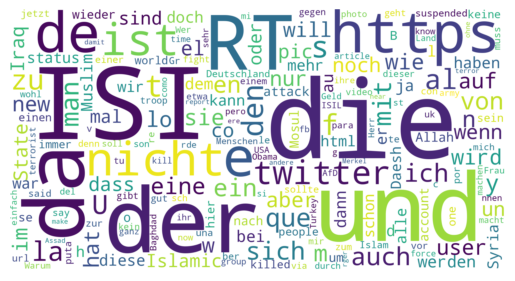

In [ ]:
# Display the generated Word Cloud

plt.imshow(word_cloud1, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
!python -m pip install tensorflow_text
import tensorflow_hub as hub
import tensorflow_text as text
import tensorflow as tf
from sklearn.metrics import accuracy_score, precision_score, recall_score
import numpy as np

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


MODEL

In [ ]:

# Load the BERT preprocessor and encoder
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

# Define the model
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)
l = tf.keras.layers.Dropout(0.1, name="dropout")(outputs['pooled_output'])
l = tf.keras.layers.Dense(256, activation='relu', name='dense')(l)   
l = tf.keras.layers.Dense(7, activation='softmax', name='output')(l)
model = tf.keras.Model(inputs=text_input, outputs=l)

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Define early stopping
es = tf.keras.callbacks.EarlyStopping(monitor='loss', mode='min', verbose=2, patience=5)





In [ ]:
text_data = df['text'].values.tolist()
text_data = np.array(text_data)
label_data = df['label'].values.tolist()
label_data = np.array(label_data)
#print(label_data)

In [ ]:
#ALL DATA
# Train the model
epochs=5


history = model.fit(text_data, label_data, epochs=5, batch_size=32, validation_split=0.2, callbacks=[es])

# Evaluate the model
predictions = model.predict(text_data)
predicted_labels = tf.argmax(predictions, axis=1)
accuracy = accuracy_score(label_data, predicted_labels)
precision = precision_score(label_data, predicted_labels, average='macro')
recall = recall_score(label_data, predicted_labels, average='macro')
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

Epoch 1/5
253/253 [==============================] - 118s 465ms/step - loss: 0.5842 - accuracy: 0.6804 - val_loss: 0.6818 - val_accuracy: 0.5672
Epoch 2/5
253/253 [==============================] - 132s 524ms/step - loss: 0.5696 - accuracy: 0.6870 - val_loss: 0.6865 - val_accuracy: 0.5672
Epoch 3/5
253/253 [==============================] - 114s 450ms/step - loss: 0.5712 - accuracy: 0.6865 - val_loss: 0.6764 - val_accuracy: 0.5741
Epoch 4/5
253/253 [==============================] - 114s 449ms/step - loss: 0.5666 - accuracy: 0.6865 - val_loss: 0.6768 - val_accuracy: 0.5835
Epoch 5/5
316/316 [==============================] - 115s 364ms/step
Accuracy: 0.6866
Precision: 0.6850
Recall: 0.6813


In [ ]:

table = PrettyTable()
table.field_names = ["Hyper Parameter", "value"]
table.add_row(["epochs", epochs])
table.add_row(["optimizer","adam"])
# table.add_row(["loss", 34])
# table.add_row(["learning rate", 34])

print(table)


+-----------------+-------+
| Hyper Parameter | value |
+-----------------+-------+
|      epochs     |   5   |
|    optimizer    |  adam |
+-----------------+-------+


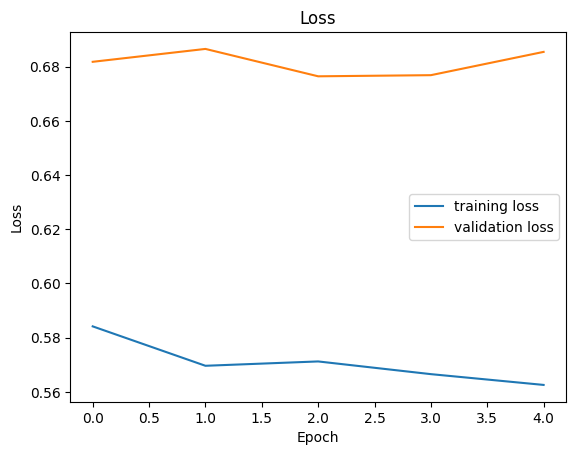

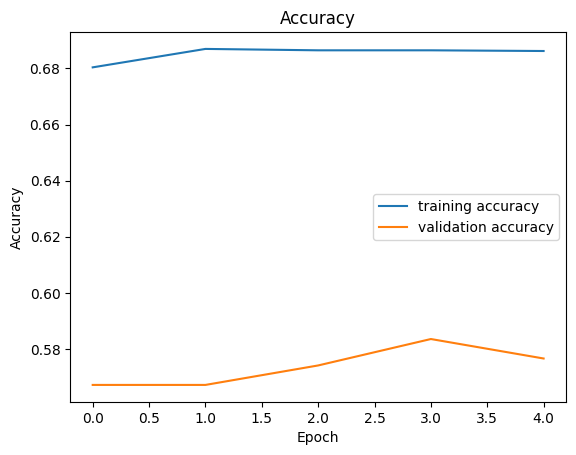

In [ ]:
import matplotlib.pyplot as plt

# Get training and validation loss values
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

# Get training and validation accuracy values
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

# Create plot for loss
plt.plot(training_loss, label='training loss')
plt.plot(validation_loss, label='validation loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Create plot for accuracy
plt.plot(training_accuracy, label='training accuracy')
plt.plot(validation_accuracy, label='validation accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix

# Get the predicted labels
predicted_labels = tf.argmax(predictions, axis=1)

# Create the confusion matrix
cm = confusion_matrix(label_data, predicted_labels)

# Print the confusion matrix
print(cm)


[[4072 1373]
 [1787 2851]]


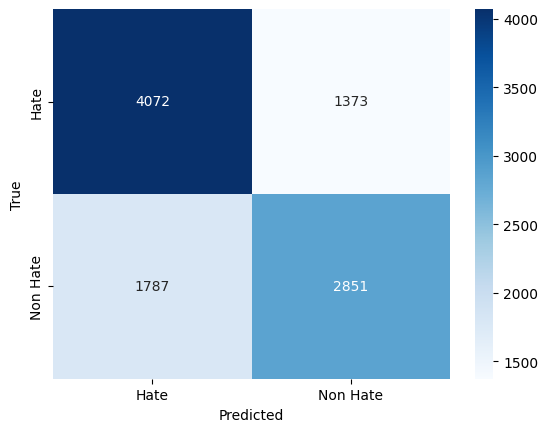

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Define the labels for the matrix
labels = ['Hate', 'Non Hate']

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('True')


# Show the plot
plt.show()

In [ ]:
text_data_E = df_E['text'].values.tolist()
text_data_E = np.array(text_data_E)
label_data_E = df_E['label'].values.tolist()
label_data_E = np.array(label_data_E)
#print(label_data)

In [ ]:
#ENGLISH DATA
# Train the model
history = model.fit(text_data_E, label_data_E, epochs=3, batch_size=32, validation_split=0.2, callbacks=[es])

# Evaluate the model
predictions = model.predict(text_data_E)
predicted_labels = tf.argmax(predictions, axis=1)
accuracy_E = accuracy_score(label_data_E, predicted_labels)
precision_E = precision_score(label_data_E, predicted_labels, average='macro')
recall_E = recall_score(label_data_E, predicted_labels, average='macro')
print(f"Accuracy: {accuracy_E:.4f}")
print(f"Precision: {precision_E:.4f}")
print(f"Recall: {recall_E:.4f}")

Epoch 1/3
125/125 [==============================] - 67s 539ms/step - loss: 0.5008 - accuracy: 0.7607 - val_loss: 0.4593 - val_accuracy: 0.7770
Epoch 2/3
125/125 [==============================] - 57s 456ms/step - loss: 0.5013 - accuracy: 0.7607 - val_loss: 0.4415 - val_accuracy: 0.8110
Epoch 3/3
157/157 [==============================] - 56s 358ms/step
Accuracy: 0.7922
Precision: 0.7984
Recall: 0.7899


In [ ]:
from sklearn.metrics import confusion_matrix

# Get the predicted labels
predicted_labels = tf.argmax(predictions, axis=1)

# Create the confusion matrix
cm = confusion_matrix(label_data_E, predicted_labels)

# Print the confusion matrix
print(cm)


[[2232  342]
 [ 697 1729]]


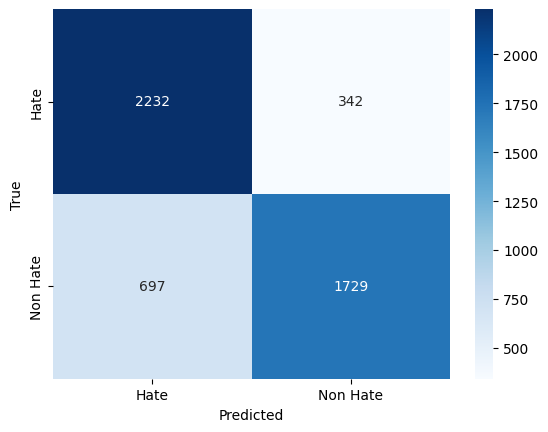

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Define the labels for the matrix
labels = ['Hate', 'Non Hate']

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('True')


# Show the plot
plt.show()

In [ ]:
text_data_G = df_G['text'].values.tolist()
text_data_G = np.array(text_data_G)
label_data_G = df_G['label'].values.tolist()
label_data_G = np.array(label_data_G)
#print(label_data)

In [ ]:
#GERMAN DATA
# Train the model
history = model.fit(text_data_G, label_data_G, epochs=3, batch_size=32, validation_split=0.2, callbacks=[es])

# Evaluate the model
predictions = model.predict(text_data_G)
predicted_labels = tf.argmax(predictions, axis=1)
accuracy_G = accuracy_score(label_data_G, predicted_labels)
precision_G = precision_score(label_data_G, predicted_labels, average='macro')
recall_G = recall_score(label_data_G, predicted_labels, average='macro')
print(f"Accuracy: {accuracy_G:.4f}")
print(f"Precision: {precision_G:.4f}")
print(f"Recall: {recall_G:.4f}")

Epoch 1/3
76/76 [==============================] - 38s 505ms/step - loss: 0.7146 - accuracy: 0.5134 - val_loss: 0.7343 - val_accuracy: 0.4926
Epoch 2/3
76/76 [==============================] - 38s 501ms/step - loss: 0.7083 - accuracy: 0.4973 - val_loss: 0.6961 - val_accuracy: 0.5173
Epoch 3/3
95/95 [==============================] - 35s 370ms/step
Accuracy: 0.5049
Precision: 0.5198
Recall: 0.5031


In [ ]:
from sklearn.metrics import confusion_matrix

# Get the predicted labels
predicted_labels = tf.argmax(predictions, axis=1)

# Create the confusion matrix
cm = confusion_matrix(label_data_G, predicted_labels)

# Print the confusion matrix
print(cm)


[[  67 1443]
 [  58 1464]]


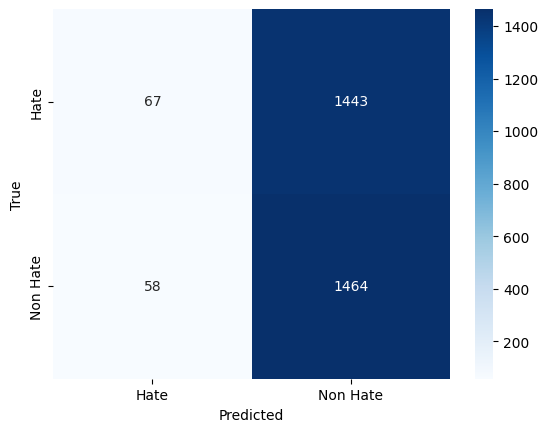

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Define the labels for the matrix
labels = ['Hate', 'Non Hate']

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('True')


# Show the plot
plt.show()

In [ ]:
text_data_S = df_S['text'].values.tolist()
text_data_S = np.array(text_data_S)
label_data_S = df_S['label'].values.tolist()
label_data_S = np.array(label_data_S)
#print(label_data)

In [ ]:
#ALL DATA
# Train the model
history = model.fit(text_data_S, label_data_S, epochs=5, batch_size=32, validation_split=0.2, callbacks=[es])

# Evaluate the model
predictions = model.predict(text_data_S)
predicted_labels = tf.argmax(predictions, axis=1)
accuracy_S = accuracy_score(label_data_S, predicted_labels)
precision_S = precision_score(label_data_S, predicted_labels, average='macro')
recall_S = recall_score(label_data_S, predicted_labels, average='macro')
print(f"Accuracy: {accuracy_S:.4f}")
print(f"Precision: {precision_S:.4f}")
print(f"Recall: {recall_S:.4f}")

Epoch 1/5
29/29 [==============================] - 13s 453ms/step - loss: 0.6012 - accuracy: 0.7021 - val_loss: 0.6506 - val_accuracy: 0.6537
Epoch 2/5
29/29 [==============================] - 16s 559ms/step - loss: 0.5552 - accuracy: 0.7313 - val_loss: 0.6535 - val_accuracy: 0.6537
Epoch 3/5
29/29 [==============================] - 13s 461ms/step - loss: 0.5541 - accuracy: 0.7356 - val_loss: 0.6456 - val_accuracy: 0.6494
Epoch 4/5
29/29 [==============================] - 13s 465ms/step - loss: 0.5478 - accuracy: 0.7367 - val_loss: 0.6595 - val_accuracy: 0.6537
Epoch 5/5
37/37 [==============================] - 13s 355ms/step
Accuracy: 0.7192
Precision: 0.6098
Recall: 0.5009


In [ ]:
from sklearn.metrics import confusion_matrix

# Get the predicted labels
predicted_labels = tf.argmax(predictions, axis=1)

# Create the confusion matrix
cm = confusion_matrix(label_data_S, predicted_labels)

# Print the confusion matrix
print(cm)

[[829   1]
 [323   1]]


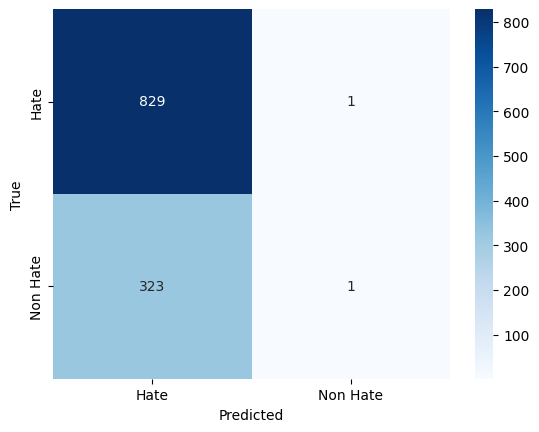

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Define the labels for the matrix
labels = ['Hate', 'Non Hate']

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('True')


# Show the plot
plt.show()